In [16]:
from PIL import Image, ImageSequence
from torchvision.transforms import ToTensor


data_path = "data/download/high_c1/high_c1_source.tif"
image = Image.open(data_path)
tt = ToTensor()
count = 0
tensor_stack = []
for i, page in enumerate(ImageSequence.Iterator(image)):
    array = tt(page)
    tensor_stack.append(array)
    count += 1

KeyboardInterrupt: 

In [ ]:
import torch

result = torch.concat(tensor_stack, dim=0)
orgD, orgH, orgW = result.shape

In [ ]:
result.shape, result.dtype, result.min(), result.max(), result.mean(), result.std()

(torch.Size([1097, 699, 760]),
 torch.float32,
 tensor(0.),
 tensor(0.8314),
 tensor(0.5033),
 tensor(0.1701))

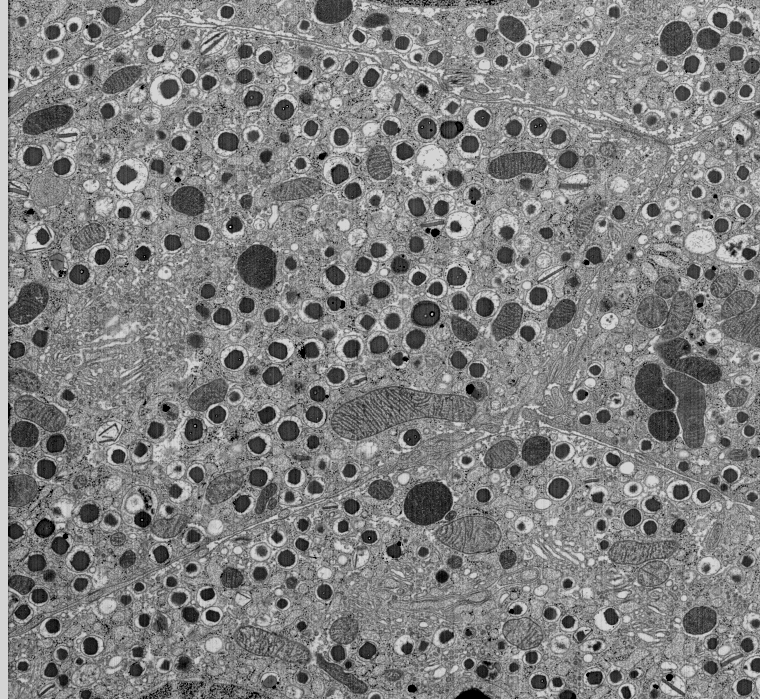

In [ ]:
page

In [ ]:
count

1097

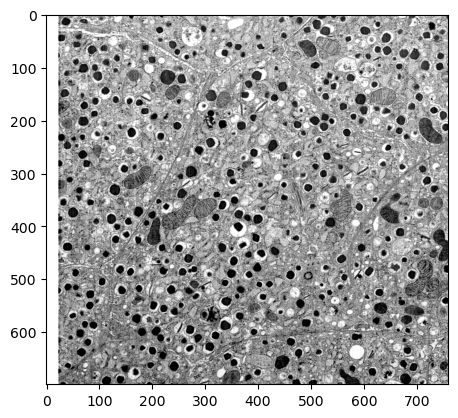

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(result[0], cmap='gray')
plt.show()

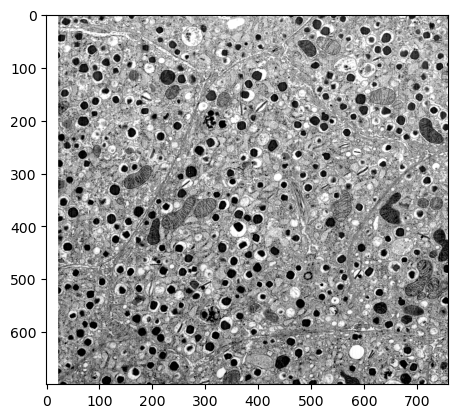

In [ ]:
plt.imshow(result[1], cmap='gray')
plt.show()

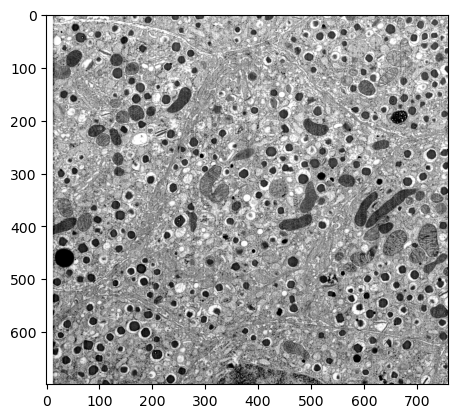

In [ ]:
plt.imshow(result[100], cmap='gray')
plt.show()

In [ ]:
plt.plot(result.max(dim=(1, 2)))

In [ ]:
import torch
import os
from PIL import Image, ImageSequence
from torchvision.transforms import ToTensor


for i in range(1, 5):
    data_path = f"data/download/high_c{i}/high_c{i}_source.tif"
    image = Image.open(data_path)
    tt = ToTensor()
    count = 0
    tensor_stack = []
    for _, page in enumerate(ImageSequence.Iterator(image)):
        array = tt(page)
        tensor_stack.append(array)
        count += 1
    result = torch.concat(tensor_stack, dim=0)
    out = f"data/dataset/high_c{i}_source_tensor"
    os.makedirs(os.path.dirname(out), exist_ok=True)
    torch.save(result, out)

In [17]:
import torch


for i in range(1, 5):
    out = f"data/dataset/high_c{i}_source_tensor"
    t = torch.load(out)
    torch.save({out.split("/")[-1].split("_tensor")[0]: t}, out)

/tmp/ipykernel_781295/1052542538.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(out)


In [18]:
import torch


for i in range(1, 5):
    out = f"data/dataset/high_c{i}_source_tensor"
    t = torch.load(out)[out.split("/")[-1].split("_tensor")[0]]
    t = t.unsqueeze(0)
    torch.save({out.split("/")[-1].split("_tensor")[0]: t}, out)

/tmp/ipykernel_781295/1520288607.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(out)[out.split("/")[-1].split("_tensor")[0]]
